In [1]:
from glob import glob
from PIL import Image
from tqdm import tqdm
import os
import cv2
import json
import shutil
import numpy as np

In [2]:
root_path = "/home/ubuntu/workspace/seunghoon/z_dataset"
target_folder_name = "diablo2_dataset_ver2"

src_folder_name = "labelme_dataset_processing1"
dst_folder_name = "labelme_dataset_processing2"

In [3]:
src_imgs = glob(os.path.join(root_path, target_folder_name, src_folder_name, "*"))
src_imgs = [i for i in src_imgs if ".png" in i or ".jpg" in i and not ".json" in i]
print(len(src_imgs))

22890


In [4]:
# naver ocr 결과에서 infer_text, coor 정보만 따로 저장
os.makedirs(os.path.join(root_path, target_folder_name, dst_folder_name), exist_ok=True)
error_lst = []
for img in tqdm(src_imgs):
    # naver_ocr_api로 생성된 json을 불러와 data_dict를 만듦
    json_path = img.replace(os.path.splitext(img)[1], ".json")
    with open(json_path, "r")as f:
        data = json.load(f)
            
    if "images" in data:
        data_dict = {}
        if "fields" in data["images"][0]:
            for idx, i in enumerate(data["images"][0]["fields"]):
                infer_text = i['inferText']
                tmp_lst = []
                for coor_dict in i['boundingPoly']['vertices']:
                    x = int(coor_dict['x'])
                    y = int(coor_dict['y'])
                    tmp_lst.append((x, y))
                data_dict[idx] = [infer_text, tmp_lst]

            dst_img_path = img.replace(src_folder_name, dst_folder_name)
            dst_json_path = json_path.replace(src_folder_name, dst_folder_name)

            shutil.copy(img , dst_img_path)

            # data_dict에는 key: idx, value: [infer_text, coor] 정보가 저장돼 있음  
            with open(dst_json_path, "w")as f:
                json.dump(data_dict, f, ensure_ascii=False)
        else:
            error_lst.append(img)
            print(img)
    else:
        print(img)

 27%|██▋       | 6203/22890 [00:10<00:26, 628.40it/s]

/home/ubuntu/workspace/seunghoon/z_dataset/diablo2_dataset_ver2/labelme_dataset_processing1/625.jpg


 53%|█████▎    | 12095/22890 [00:20<00:16, 662.67it/s]

/home/ubuntu/workspace/seunghoon/z_dataset/diablo2_dataset_ver2/labelme_dataset_processing1/2603.png


 76%|███████▌  | 17379/22890 [00:28<00:08, 648.77it/s]

/home/ubuntu/workspace/seunghoon/z_dataset/diablo2_dataset_ver2/labelme_dataset_processing1/2547.jpg


 96%|█████████▌| 21971/22890 [00:36<00:01, 699.82it/s]

/home/ubuntu/workspace/seunghoon/z_dataset/diablo2_dataset_ver2/labelme_dataset_processing1/2883.png


100%|██████████| 22890/22890 [00:37<00:00, 607.64it/s]


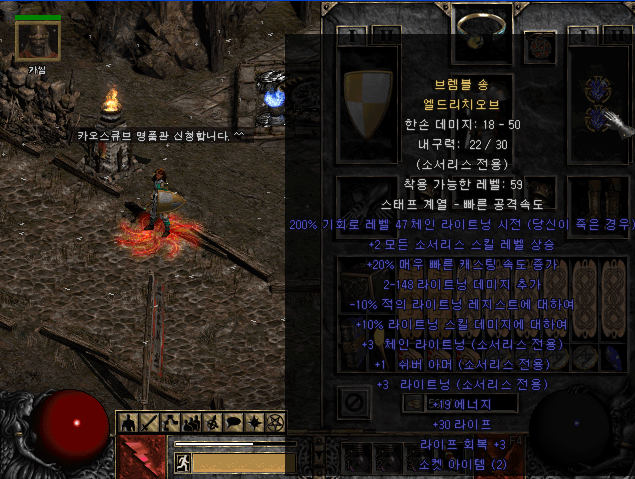

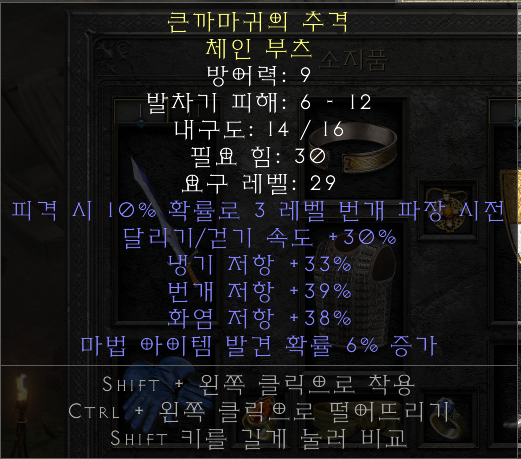

ValueError: Could not save to PNG for display

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4000x3000>

ValueError: Could not save to PNG for display

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=270x390>

In [5]:
for error_img in error_lst:
    display(Image.open(error_img))